# Matplotlib_venn -- 用Python画venn图

## 主要函数
### venn2函数——用于创建一个由两个集合构成的venn图

venn2函数的参数:
> 必要参数: **subsets**
>
> subsets有一共两种输入形式，任选一种即可：
>
> 1. 输入一个包含三个元素的元组(a, b, c)，三个元素分别对应第一个集合所生成圆的大小，第二个集合所生成圆的大小，两个圆重叠部分的大小。a,b,c均为数字（整数和浮点数都可以）。同样地，可以输入字典{'10': a, '01': b, '11': c}，a,b,c的含义和上面相同。e.g
> 2. 输入一个包含两个集合（set）的列表。这两个集合中的元素表示我们想要表示的两个集合所拥有的元素。不过输出的时候只会输出每一个部分有几个元素，而不会把元素呈现出来。 e.g
>
> 可选参数(等号后面为默认值):
> 1. set_labels = ("A", "B")  分别表示集合下边的标签
> 2. set_colors = ("g", "r")  分别表示集合的颜色，重叠部分的颜色为两种颜色混合之后的颜色。可以输入颜色的首字母，也可以输入颜色的全称。当然最好输入颜色的全称，一是增加代码的可读性，二是不会造成混淆(比如说输入b代表蓝色，但是black(黑色)的首字母也是b);而且输入首字母有时候会报错(比如说输入purple表示紫色，但是输入p会报错)。
> 3. alpha = 0.5  表示颜色深浅程度，取值在0到1之间，值越大颜色越深。
> 4. normalize_to = 1  
> 5. ax = None  
> 6. subset_label_formatter = None

### venn2_circles
venn2_circles和venn2的作用一样，要输入的参数也差不多(具体可以通过代码help(venn2_circles)查询，这里就不再赘述)，不过通过venn2_circle形成的venn图只有两个圆的轮廓。

### venn3函数——用于创建一个由三个集合构成的venn图

venn3的所有参数和venn2的一样。除了要注意subsets（用集合形式输入）,set_labels,set_colors要对应输入三个值之外，还要注意subsets的元组/字典输入形式。subsets的元祖/字典输入形式形式为：
> 元组: (Abc, aBc, ABc, abC, AbC, aBC, ABC) 元组中一共有七个数字。Abc表示有A中的元素，没有B,C中的元素，aBc表示有B中的元素，没有A,C中的元素，以此类推；它们的值表示所对应区域的大小。
> 字典: {'100': Abc, '010': aBc, '110': ABc, '001': abC, '101': AbC, '011': aBC, '111': ABC} 其中Abc, aBc...与上面的Abc, aBc...含义相同。 
### venn3_circles
venn3_circles和venn2_circles差不多。

官方文档: [matplotlib_venn](https://github.com/konstantint/matplotlib-venn)

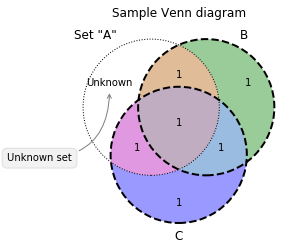

In [27]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles
plt.figure(figsize=(4,4))
v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'))
v.get_patch_by_id('100').set_alpha(1.0)
v.get_patch_by_id('100').set_color('white')
v.get_label_by_id('100').set_text('Unknown')
v.get_label_by_id('A').set_text('Set "A"')
c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='dashed')
c[0].set_lw(1.0)
c[0].set_ls('dotted')
plt.title("Sample Venn diagram")
plt.annotate('Unknown set', xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
plt.show()

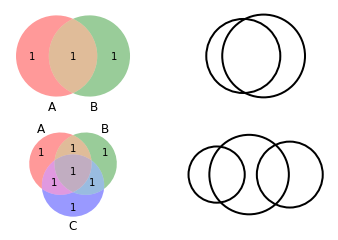

In [28]:
from matplotlib_venn import venn2, venn2_circles
figure, axes = plt.subplots(2, 2)
venn2(subsets={'10': 1, '01': 1, '11': 1}, set_labels = ('A', 'B'), ax=axes[0][0])
venn2_circles((1, 2, 3), ax=axes[0][1])
venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'), ax=axes[1][0])
venn3_circles({'001': 10, '100': 20, '010': 21, '110': 13, '011': 14}, ax=axes[1][1])
plt.show()